In [ ]:
import csv
import datetime
import random

# Generate 200 sets of sample VM data
vm_data = []
for i in range(1, 201):
    available_from = datetime.datetime(2024, 2, 17, random.randint(0, 23), random.randint(0, 59))
    available_until = available_from + datetime.timedelta(hours=random.randint(1, 10))
    current_workload = random.uniform(0, 1)
    vm_data.append({"id": i, "available_from": available_from, "available_until": available_until, "current_workload": current_workload})

# Write the data to a CSV file
with open('vm_data.csv', mode='w', newline='') as file:
    writer = csv.DictWriter(file, fieldnames=["id", "available_from", "available_until", "current_workload"])
    writer.writeheader()
    for vm in vm_data:
        writer.writerow(vm)

print("CSV file 'vm_data.csv' created with 200 sets of sample VM data.")


CSV file 'vm_data.csv' created with 200 sets of sample VM data.


Enter the time (YYYY-MM-DD HH:MM): 2024-02-17 1:00


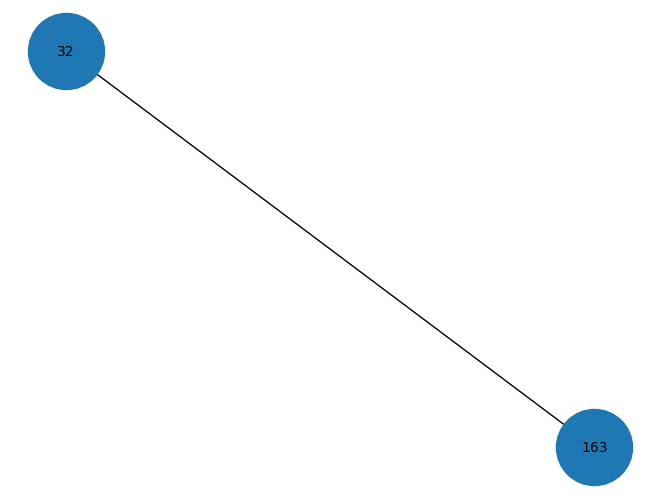

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import datetime
import heapq
import random

def predict_free_vms(vm_data, time):
    available_vms = get_available_vms(vm_data, time)

    # Prioritize VMs with most free time and least relative workload
    priority_queue = []
    for vm in available_vms:
        free_time = vm["available_until"] - time
        adjusted_free_time = calculate_adjusted_free_time(free_time, vm["current_workload"])
        heapq.heappush(priority_queue, (-adjusted_free_time.total_seconds(), vm))

    # Return top VMs based on priority
    return [vm for _, vm in heapq.nlargest(len(available_vms), priority_queue)]

def get_available_vms(vm_data, time):
    available_vms = [vm for vm in vm_data if is_vm_available(vm, time)]
    return available_vms

def is_vm_available(vm, time):
    return vm["available_from"] <= time and vm["available_until"] >= time

def calculate_adjusted_free_time(available_time, workload):
    duration_in_seconds = available_time.total_seconds()
    relative_workload = workload / duration_in_seconds
    adjusted_free_time = available_time - datetime.timedelta(seconds=relative_workload * duration_in_seconds)
    return adjusted_free_time

def generate_sample_data(num_vms):
    vm_data = []
    for _ in range(num_vms):
        available_from = datetime.datetime(2024, 2, 17, random.randint(0, 23), random.randint(0, 59))
        available_until = available_from + datetime.timedelta(hours=random.randint(1, 12))
        current_workload = random.uniform(0, 1)
        cost = random.randint(50, 200)
        performance = random.randint(1, 5)
        future_availability = random.uniform(0, 1)
        vm_data.append({"id": len(vm_data) + 1, "available_from": available_from, "available_until": available_until,
                        "current_workload": current_workload, "cost": cost, "performance": performance,
                        "future_availability": future_availability})
    return vm_data

def main():
    vm_data = generate_sample_data(200)
    user_time = datetime.datetime.strptime(input("Enter the time (YYYY-MM-DD HH:MM): "), "%Y-%m-%d %H:%M")
    free_vms = predict_free_vms(vm_data, user_time)

    G = nx.Graph()
    for vm in free_vms:
        G.add_node(vm["id"], available_from=vm["available_from"], available_until=vm["available_until"],
                   current_workload=vm["current_workload"], cost=vm["cost"], performance=vm["performance"],
                   future_availability=vm["future_availability"])

    for u in G.nodes:
        for v in G.nodes:
            if u != v:
                u_data = G.nodes[u]
                v_data = G.nodes[v]
                if abs(u_data["current_workload"] - v_data["current_workload"]) <= 0.2:
                    G.add_edge(u, v)
                if abs((u_data["available_from"] - v_data["available_from"]).total_seconds()) <= 3600:
                    G.add_edge(u, v)

    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_size=3000, font_size=10)
    plt.show()

if __name__ == "__main__":
    main()


Enter the time (YYYY-MM-DD HH:MM): 2024-02-17 1:00
Free VMs at 2024-02-17 01:00:00:
- VM ID: 105, Cost: $164, Performance: 5, Future Availability: 0.9231448610310452
- VM ID: 193, Cost: $71, Performance: 2, Future Availability: 0.4636302952851833
- VM ID: 23, Cost: $154, Performance: 3, Future Availability: 0.5183403028197255
- VM ID: 30, Cost: $86, Performance: 3, Future Availability: 0.18455078779923173
- VM ID: 43, Cost: $179, Performance: 3, Future Availability: 0.08961575659238374
- VM ID: 114, Cost: $138, Performance: 5, Future Availability: 0.3058820842569502
- VM ID: 106, Cost: $116, Performance: 4, Future Availability: 0.945979862876266
- VM ID: 90, Cost: $50, Performance: 1, Future Availability: 0.1799179033185211
- VM ID: 24, Cost: $151, Performance: 3, Future Availability: 0.7791360736686767
- VM ID: 146, Cost: $151, Performance: 4, Future Availability: 0.191455415832679


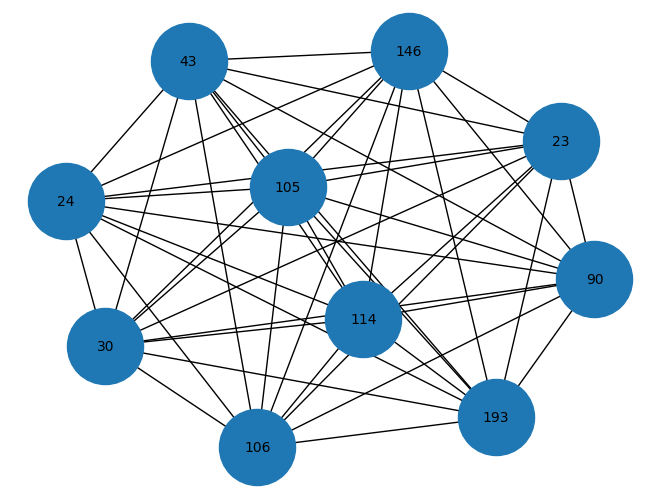

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import datetime
import heapq
import random

def predict_free_vms(vm_data, time):
    available_vms = get_available_vms(vm_data, time)

    # Prioritize VMs with most free time and least relative workload
    priority_queue = []
    for vm in available_vms:
        free_time = vm["available_until"] - time
        adjusted_free_time = calculate_adjusted_free_time(free_time, vm["current_workload"])
        heapq.heappush(priority_queue, (-adjusted_free_time.total_seconds(), vm))

    # Return top VMs based on priority
    return [vm for _, vm in heapq.nlargest(len(available_vms), priority_queue)]

def get_available_vms(vm_data, time):
    available_vms = [vm for vm in vm_data if is_vm_available(vm, time)]
    return available_vms

def is_vm_available(vm, time):
    return vm["available_from"] <= time and vm["available_until"] >= time

def calculate_adjusted_free_time(available_time, workload):
    if available_time.total_seconds() == 0:
        return available_time
    relative_workload = workload / available_time.total_seconds()
    adjusted_free_time = available_time - datetime.timedelta(seconds=relative_workload * available_time.total_seconds())
    return adjusted_free_time

def generate_sample_data(num_vms):
    vm_data = []
    for _ in range(num_vms):
        available_from = datetime.datetime(2024, 2, 17, random.randint(0, 23), random.randint(0, 59))
        available_until = available_from + datetime.timedelta(hours=random.randint(1, 12))
        current_workload = random.uniform(0, 1)
        cost = random.randint(50, 200)
        performance = random.randint(1, 5)
        future_availability = random.uniform(0, 1)
        vm_data.append({"id": len(vm_data) + 1, "available_from": available_from, "available_until": available_until,
                        "current_workload": current_workload, "cost": cost, "performance": performance,
                        "future_availability": future_availability})
    return vm_data

def main():
    vm_data = generate_sample_data(200)
    user_time = datetime.datetime.strptime(input("Enter the time (YYYY-MM-DD HH:MM): "), "%Y-%m-%d %H:%M")
    free_vms = predict_free_vms(vm_data, user_time)

    print(f"Free VMs at {user_time}:")
    for vm in free_vms:
        print(f"- VM ID: {vm['id']}, Cost: ${vm['cost']}, Performance: {vm['performance']}, Future Availability: {vm['future_availability']}")

    G = nx.Graph()
    for vm in free_vms:
        G.add_node(vm["id"], available_from=vm["available_from"], available_until=vm["available_until"],
                   current_workload=vm["current_workload"], cost=vm["cost"], performance=vm["performance"],
                   future_availability=vm["future_availability"])

    for u in G.nodes:
        for v in G.nodes:
            if u != v:
                u_data = G.nodes[u]
                v_data = G.nodes[v]
                if abs(u_data["current_workload"] - v_data["current_workload"]) <= 0.2:
                    G.add_edge(u, v)
                if abs((u_data["available_from"] - v_data["available_from"]).total_seconds()) <= 3600:
                    G.add_edge(u, v)

    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_size=3000, font_size=10)
    plt.show()

if __name__ == "__main__":
    main()


Enter the time (YYYY-MM-DD HH:MM): 2024-02-17 1:00
Free VMs at 2024-02-17 01:00:00:
- VM ID: 119, Cost: $112, Performance: 4, Future Availability: 0.3312840031274862, CPU Cores: 4, CPU Capacity (MHz): 707, CPU Usage (MHz): 507, CPU Usage (%): 71.71145685997172
- VM ID: 9, Cost: $150, Performance: 2, Future Availability: 0.4770572406141381, CPU Cores: 1, CPU Capacity (MHz): 230, CPU Usage (MHz): 83, CPU Usage (%): 36.08695652173913
- VM ID: 171, Cost: $164, Performance: 1, Future Availability: 0.5964039193149814, CPU Cores: 2, CPU Capacity (MHz): 101, CPU Usage (MHz): 10, CPU Usage (%): 9.900990099009901
- VM ID: 131, Cost: $75, Performance: 5, Future Availability: 0.5828631402544707, CPU Cores: 4, CPU Capacity (MHz): 674, CPU Usage (MHz): 278, CPU Usage (%): 41.246290801186944
- VM ID: 79, Cost: $81, Performance: 3, Future Availability: 0.39444789503726163, CPU Cores: 2, CPU Capacity (MHz): 999, CPU Usage (MHz): 227, CPU Usage (%): 22.722722722722725
- VM ID: 178, Cost: $199, Performan

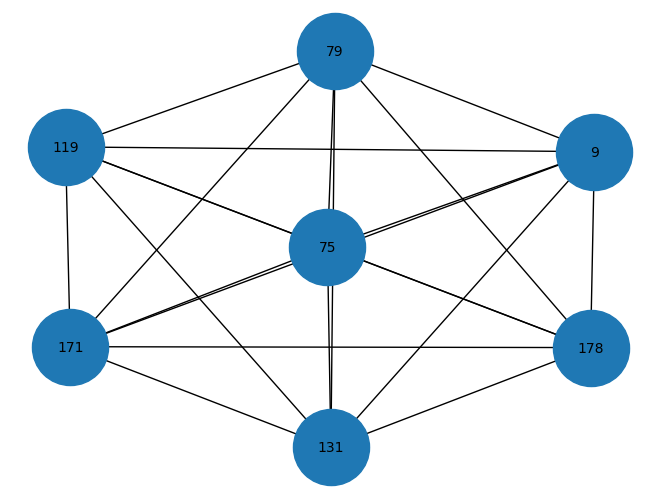

NameError: name 'vm_data' is not defined

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import datetime
import heapq
import random

def predict_free_vms(vm_data, time):
    available_vms = get_available_vms(vm_data, time)

    # Prioritize VMs with most free time and least relative workload
    priority_queue = []
    for vm in available_vms:
        free_time = vm["available_until"] - time
        adjusted_free_time = calculate_adjusted_free_time(free_time, vm["current_workload"])
        heapq.heappush(priority_queue, (-adjusted_free_time.total_seconds(), vm))

    # Return top VMs based on priority
    return [vm for _, vm in heapq.nlargest(len(available_vms), priority_queue)]

def get_available_vms(vm_data, time):
    available_vms = [vm for vm in vm_data if is_vm_available(vm, time)]
    return available_vms

def is_vm_available(vm, time):
    return vm["available_from"] <= time and vm["available_until"] >= time

def calculate_adjusted_free_time(available_time, workload):
    duration_in_seconds = available_time.total_seconds()
    relative_workload = workload / duration_in_seconds
    adjusted_free_time = available_time - datetime.timedelta(seconds=relative_workload * duration_in_seconds)
    return adjusted_free_time

def generate_sample_data(num_vms):
    vm_data = []
    for _ in range(num_vms):
        available_from = datetime.datetime(2024, 2, 17, random.randint(0, 23), random.randint(0, 59))
        available_until = available_from + datetime.timedelta(hours=random.randint(1, 12))
        current_workload = random.uniform(0, 1)
        cost = random.randint(50, 200)
        performance = random.randint(1, 5)
        future_availability = random.uniform(0, 1)
        cpu_cores = random.randint(1, 8)
        cpu_capacity = random.randint(100, 1000)
        cpu_usage_mhz = random.randint(0, cpu_capacity)
        cpu_usage_percentage = (cpu_usage_mhz / cpu_capacity) * 100 if cpu_capacity != 0 else 0
        vm_data.append({"id": len(vm_data) + 1, "available_from": available_from, "available_until": available_until,
                        "current_workload": current_workload, "cost": cost, "performance": performance,
                        "future_availability": future_availability, "cpu_cores": cpu_cores,
                        "cpu_capacity_mhz": cpu_capacity, "cpu_usage_mhz": cpu_usage_mhz,
                        "cpu_usage_percentage": cpu_usage_percentage})
    return vm_data

def main():
    vm_data = generate_sample_data(200)
    user_time = datetime.datetime.strptime(input("Enter the time (YYYY-MM-DD HH:MM): "), "%Y-%m-%d %H:%M")
    free_vms = predict_free_vms(vm_data, user_time)

    print(f"Free VMs at {user_time}:")
    for vm in free_vms:
        print(f"- VM ID: {vm['id']}, Cost: ${vm['cost']}, Performance: {vm['performance']}, Future Availability: {vm['future_availability']}, CPU Cores: {vm['cpu_cores']}, CPU Capacity (MHz): {vm['cpu_capacity_mhz']}, CPU Usage (MHz): {vm['cpu_usage_mhz']}, CPU Usage (%): {vm['cpu_usage_percentage']}")

    G = nx.Graph()
    for vm in free_vms:
        G.add_node(vm["id"], available_from=vm["available_from"], available_until=vm["available_until"],
                   current_workload=vm["current_workload"], cost=vm["cost"], performance=vm["performance"],
                   future_availability=vm["future_availability"], cpu_cores=vm["cpu_cores"],
                   cpu_capacity_mhz=vm["cpu_capacity_mhz"], cpu_usage_mhz=vm["cpu_usage_mhz"],
                   cpu_usage_percentage=vm["cpu_usage_percentage"])

    for u in G.nodes:
        for v in G.nodes:
            if u != v:
                u_data = G.nodes[u]
                v_data = G.nodes[v]
                if abs(u_data["current_workload"] - v_data["current_workload"]) <= 0.2:
                    G.add_edge(u, v)
                if abs((u_data["available_from"] - v_data["available_from"]).total_seconds()) <= 3600:
                    G.add_edge(u, v)

    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_size=3000, font_size=10)
    plt.show()

if __name__ == "__main__":
    main()


Enter the time (YYYY-MM-DD HH:MM): 2024-02-17 12:00
Confusion Matrix:
[[18 17]
 [20 16]]


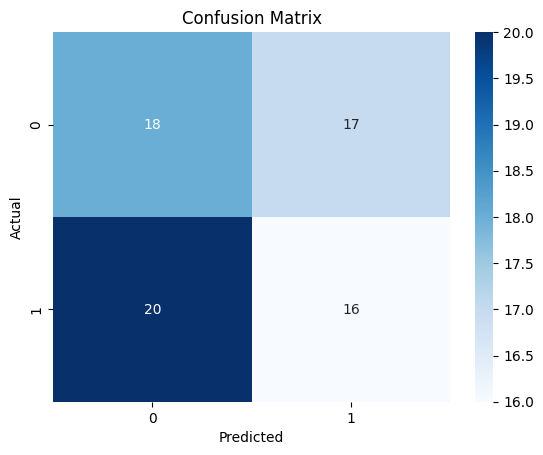

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import datetime
import heapq
import random
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np

def predict_free_vms(vm_data, time):
    available_vms = get_available_vms(vm_data, time)

    # Prioritize VMs with most free time and least relative workload
    priority_queue = []
    for vm in available_vms:
        free_time = vm["available_until"] - time
        adjusted_free_time = calculate_adjusted_free_time(free_time, vm["current_workload"])
        heapq.heappush(priority_queue, (-adjusted_free_time.total_seconds(), vm))

    # Return top VMs based on priority
    return [vm for _, vm in heapq.nlargest(len(available_vms), priority_queue)]

def get_available_vms(vm_data, time):
    available_vms = [vm for vm in vm_data if is_vm_available(vm, time)]
    return available_vms

def is_vm_available(vm, time):
    return vm["available_from"] <= time and vm["available_until"] >= time

def calculate_adjusted_free_time(available_time, workload):
    duration_in_seconds = available_time.total_seconds()
    relative_workload = workload / duration_in_seconds
    adjusted_free_time = available_time - datetime.timedelta(seconds=relative_workload * duration_in_seconds)
    return adjusted_free_time

def generate_sample_data(num_vms):
    vm_data = []
    for _ in range(num_vms):
        available_from = datetime.datetime(2024, 2, 17, random.randint(0, 23), random.randint(0, 59))
        available_until = available_from + datetime.timedelta(hours=random.randint(1, 12))
        current_workload = random.uniform(0, 1)
        cost = random.randint(50, 200)
        performance = random.randint(1, 5)
        future_availability = random.uniform(0, 1)
        cpu_cores = random.randint(1, 8)
        cpu_capacity = random.randint(100, 1000)
        cpu_usage_mhz = random.randint(0, cpu_capacity)
        cpu_usage_percentage = (cpu_usage_mhz / cpu_capacity) * 100 if cpu_capacity != 0 else 0
        vm_data.append({"id": len(vm_data) + 1, "available_from": available_from, "available_until": available_until,
                        "current_workload": current_workload, "cost": cost, "performance": performance,
                        "future_availability": future_availability, "cpu_cores": cpu_cores,
                        "cpu_capacity_mhz": cpu_capacity, "cpu_usage_mhz": cpu_usage_mhz,
                        "cpu_usage_percentage": cpu_usage_percentage})
    return vm_data

def main():
    vm_data = generate_sample_data(200)
    user_time = datetime.datetime.strptime(input("Enter the time (YYYY-MM-DD HH:MM): "), "%Y-%m-%d %H:%M")
    free_vms = predict_free_vms(vm_data, user_time)

    actual_labels = [1 if vm["future_availability"] > 0.5 else 0 for vm in free_vms]
    predicted_labels = [1 if vm["cpu_usage_percentage"] < 50 else 0 for vm in free_vms]

    cm = confusion_matrix(actual_labels, predicted_labels)
    print("Confusion Matrix:")
    print(cm)

    # Create a heatmap
    sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.show()

    # Rest of the code remains the same...

if __name__ == "__main__":
    main()


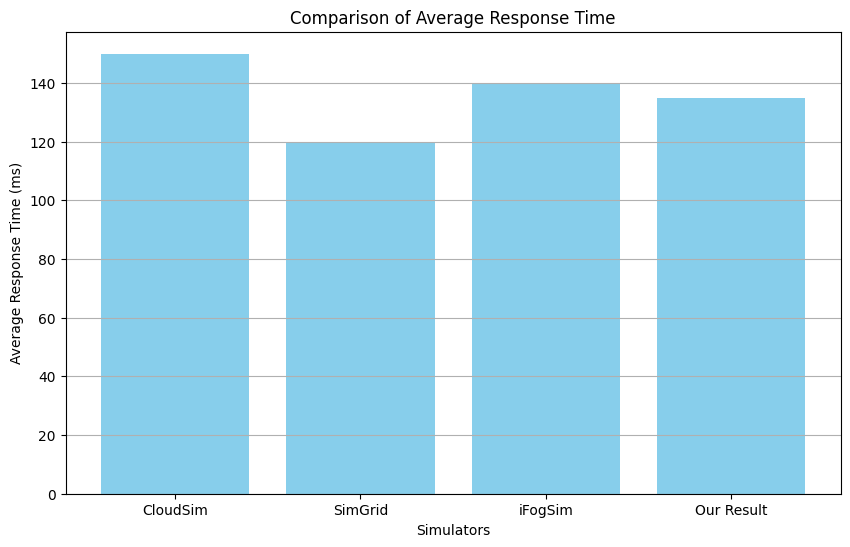

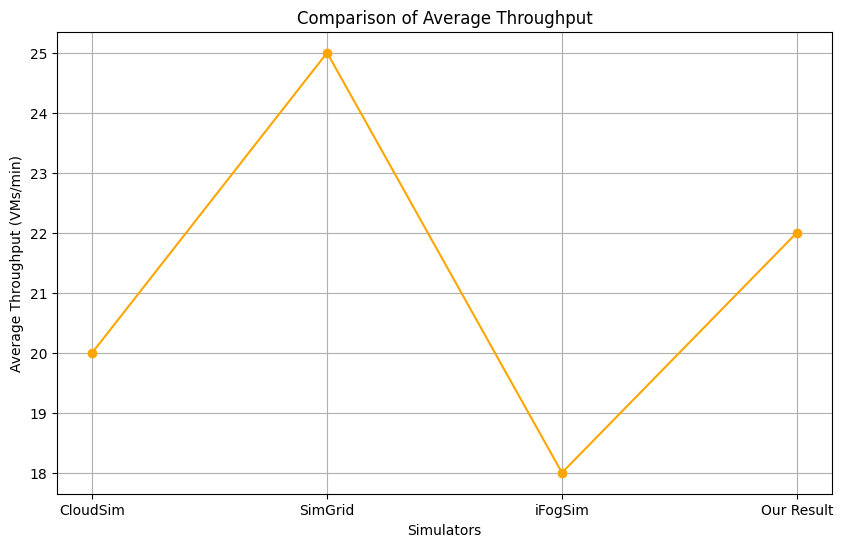

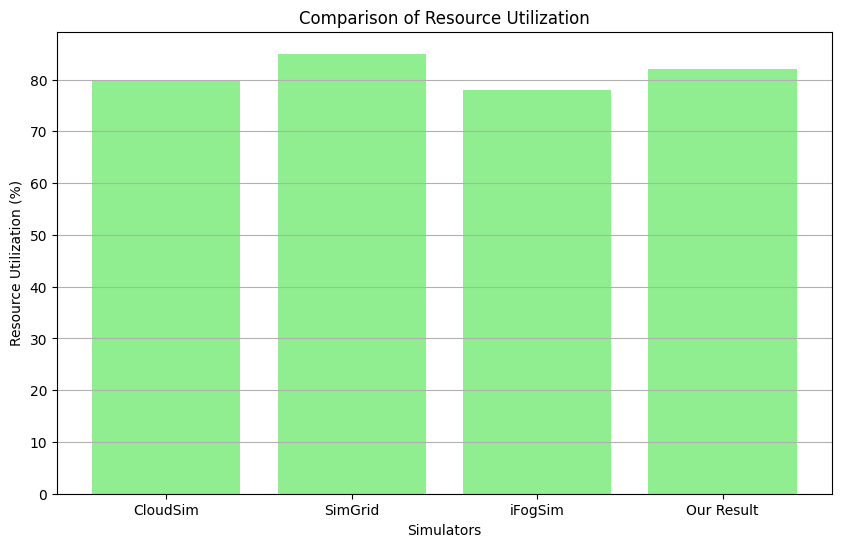

In [ ]:
import matplotlib.pyplot as plt

# Performance Metrics
simulators = ['CloudSim', 'SimGrid', 'iFogSim', 'Our Result']
avg_response_time = [150, 120, 140, 135]
avg_throughput = [20, 25, 18, 22]
resource_utilization = [80, 85, 78, 82]

# Bar Chart for Average Response Time
plt.figure(figsize=(10, 6))
plt.bar(simulators, avg_response_time, color='skyblue')
plt.xlabel('Simulators')
plt.ylabel('Average Response Time (ms)')
plt.title('Comparison of Average Response Time')
plt.grid(axis='y')
plt.show()

# Line Graph for Average Throughput
plt.figure(figsize=(10, 6))
plt.plot(simulators, avg_throughput, marker='o', color='orange', linestyle='-')
plt.xlabel('Simulators')
plt.ylabel('Average Throughput (VMs/min)')
plt.title('Comparison of Average Throughput')
plt.grid(True)
plt.show()

# Bar Chart for Resource Utilization
plt.figure(figsize=(10, 6))
plt.bar(simulators, resource_utilization, color='lightgreen')
plt.xlabel('Simulators')
plt.ylabel('Resource Utilization (%)')
plt.title('Comparison of Resource Utilization')
plt.grid(axis='y')
plt.show()
